/var/folders/68/mhmqcpdn52943pyql2n4wj440000gn/T/ipykernel_48717/311697035.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.fillna(0, inplace=True)


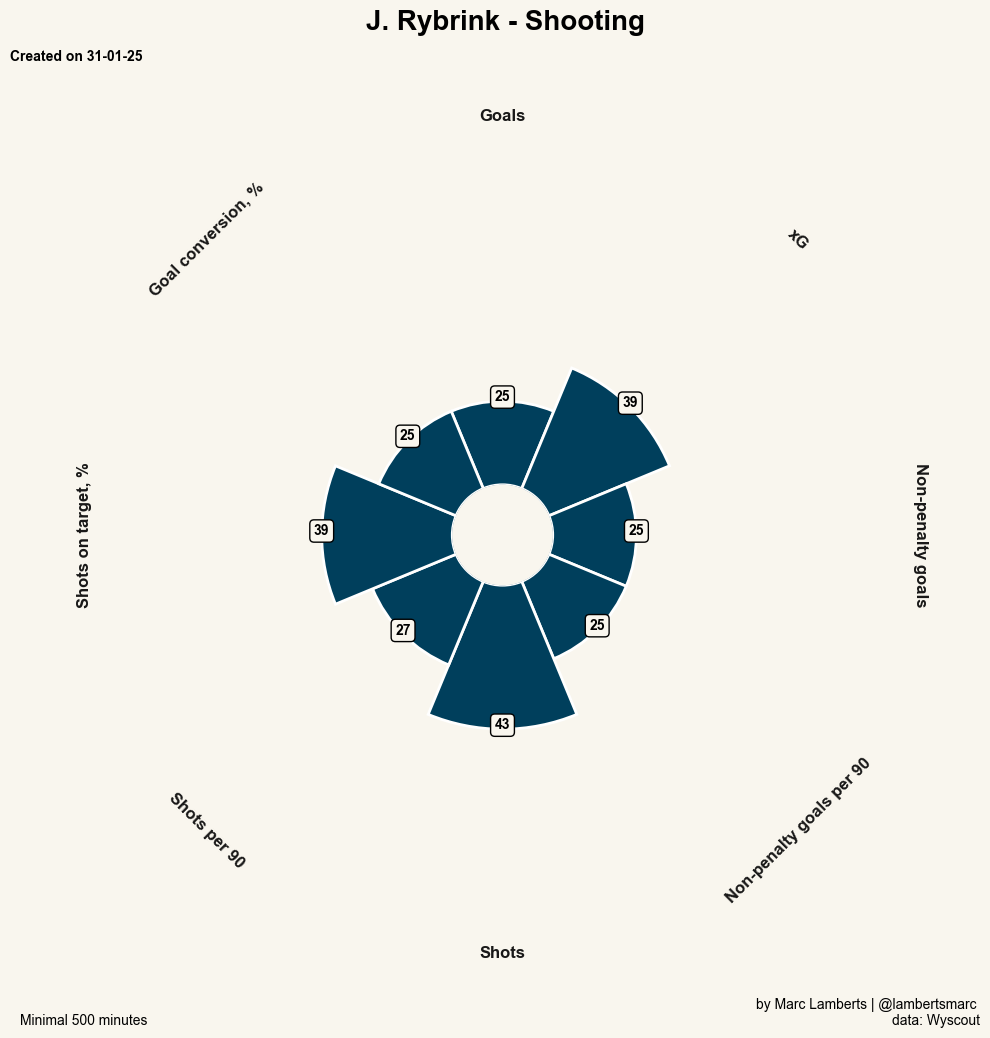

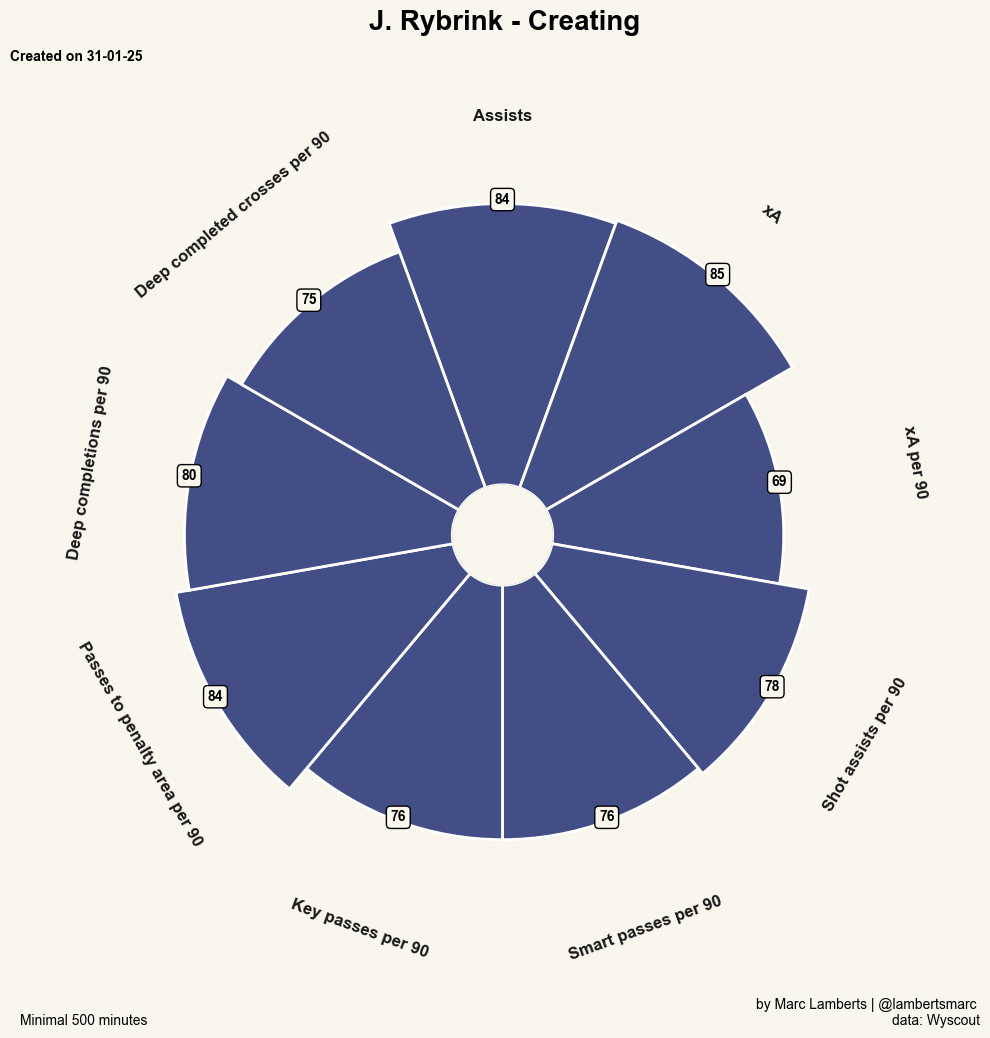

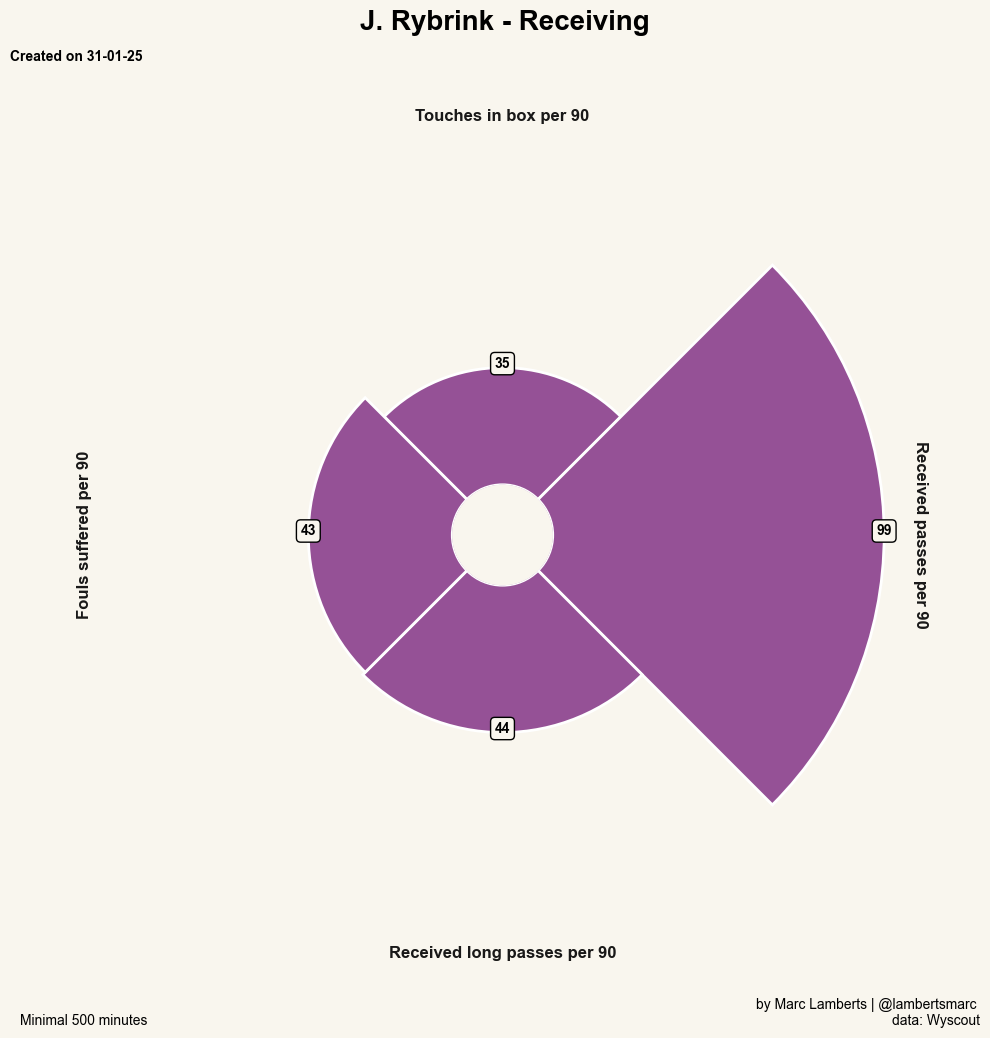

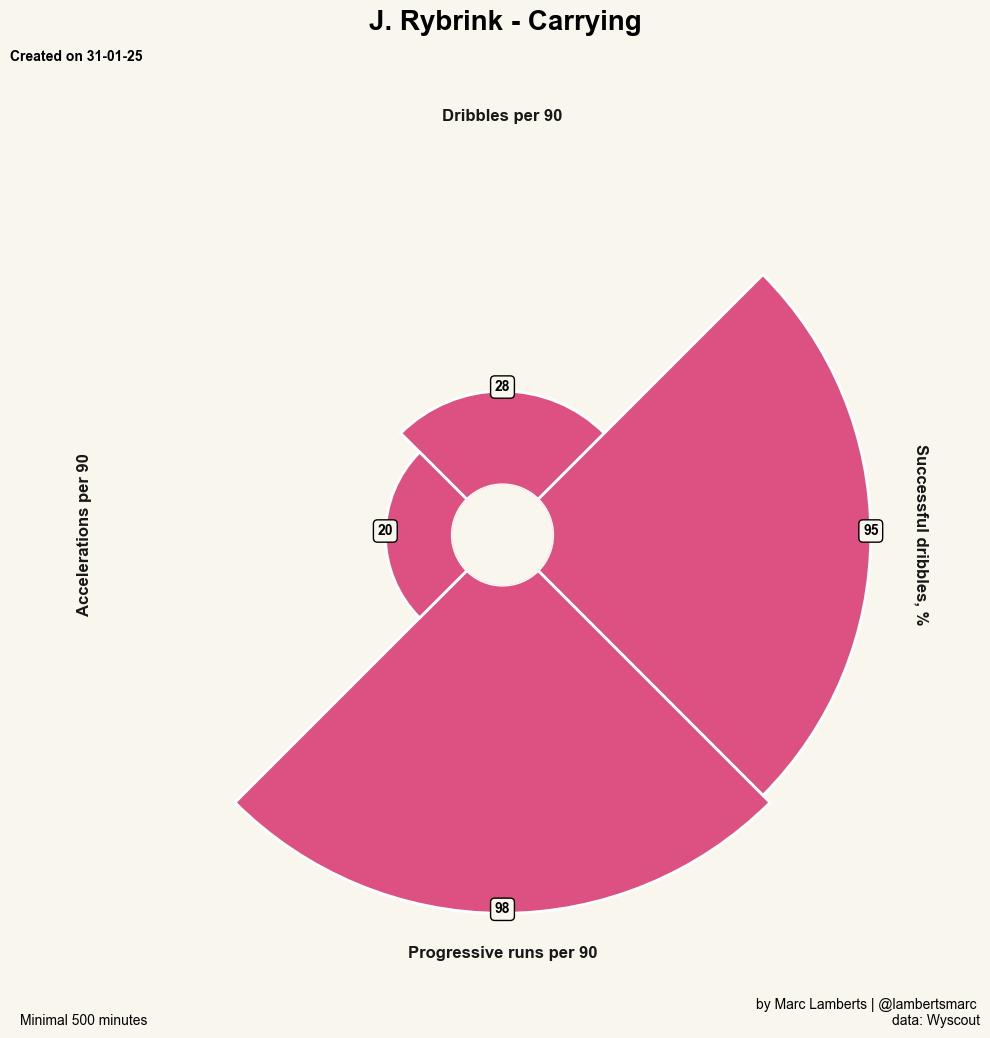

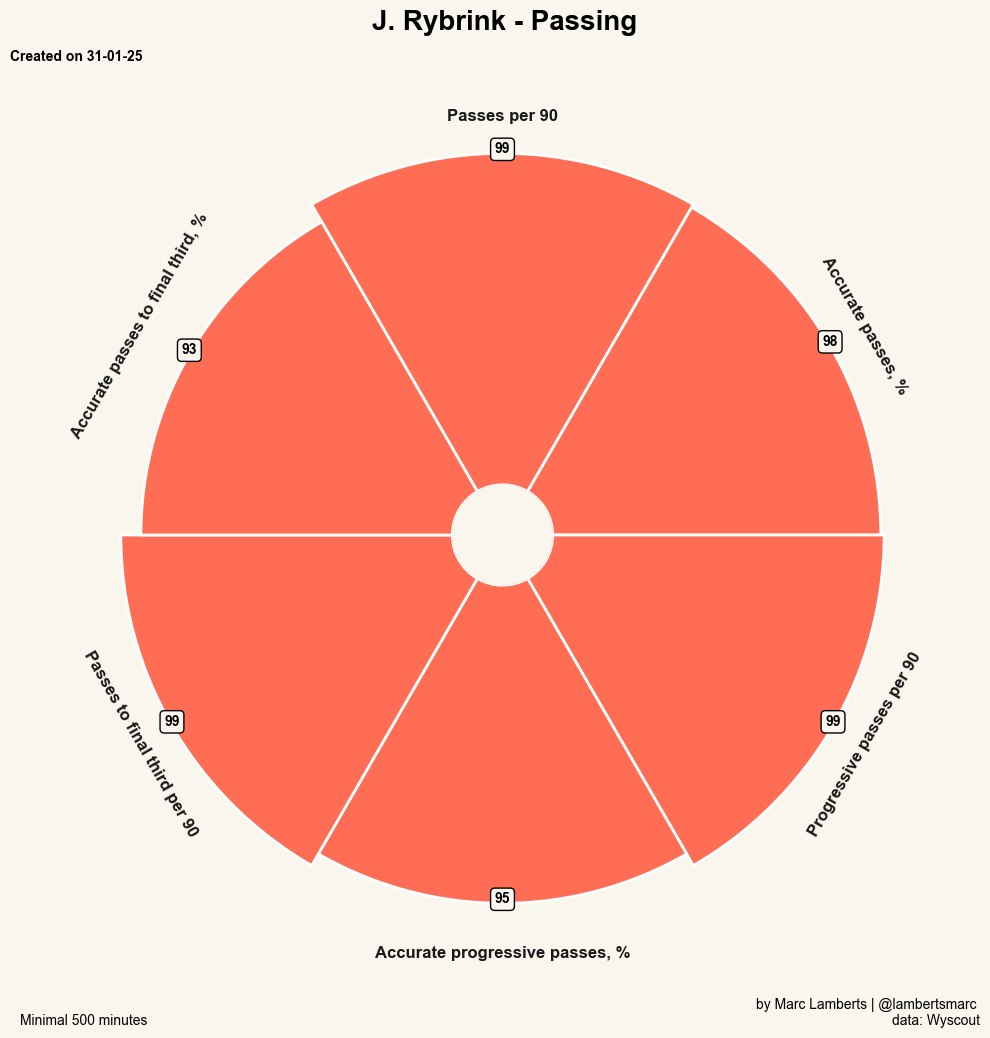

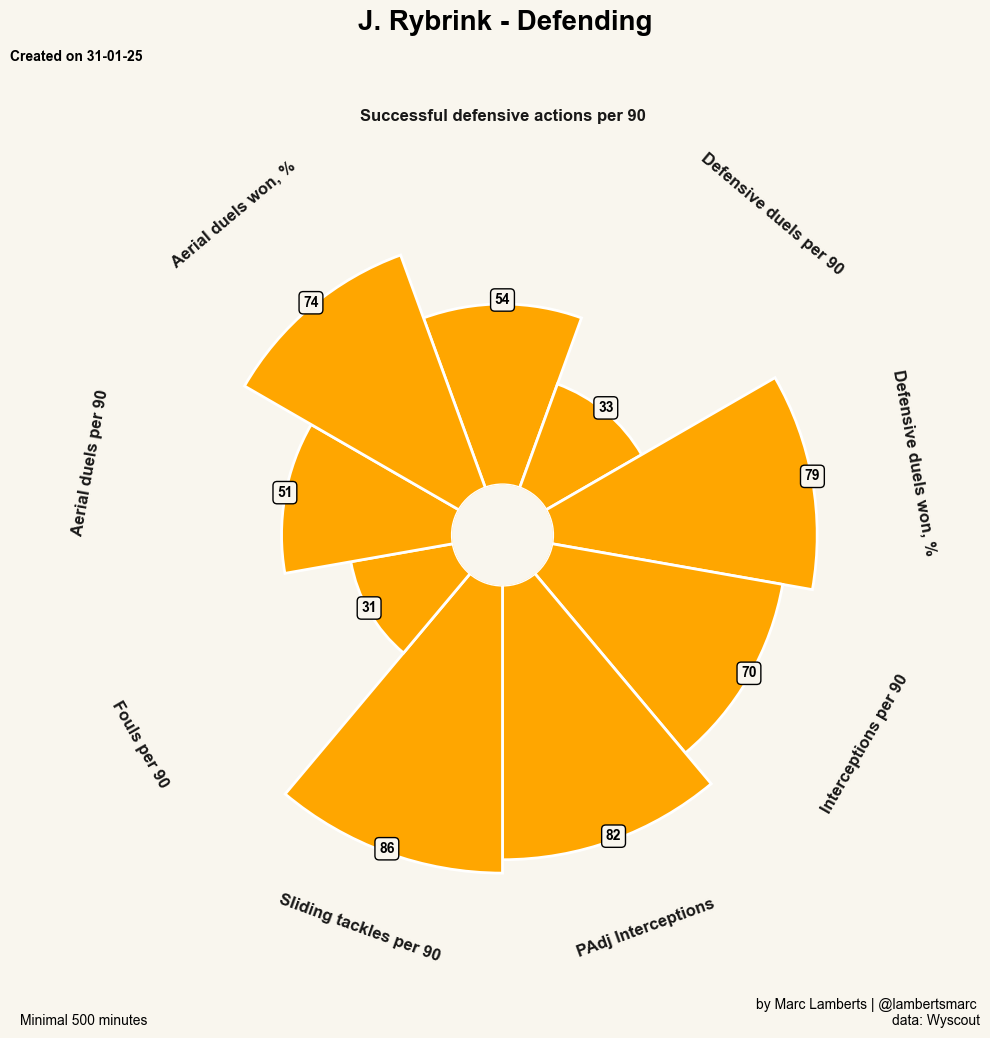

In [6]:
import pandas as pd
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt
from mplsoccer import PyPizza
from datetime import datetime

# Load the Excel file
file_path = '/Users/marclambertes/Downloads/Wyscout/SWE.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path)

# Define categories and corresponding metrics
categories = {
    "Shooting": [
        "Goals", "xG", "Non-penalty goals", "Non-penalty goals per 90",
        "Shots", "Shots per 90", "Shots on target, %", "Goal conversion, %"
    ],
    "Creating": [
        "Assists", "xA", "xA per 90", "Shot assists per 90", "Smart passes per 90",
        "Key passes per 90", "Passes to penalty area per 90", "Deep completions per 90",
        "Deep completed crosses per 90"
    ],
    "Receiving": [
        "Touches in box per 90", "Received passes per 90", "Received long passes per 90",
        "Fouls suffered per 90"
    ],
    "Carrying": [
        "Dribbles per 90", "Successful dribbles, %", "Progressive runs per 90", "Accelerations per 90"
    ],
    "Passing": [
        "Passes per 90", "Accurate passes, %", "Progressive passes per 90",
        "Accurate progressive passes, %", "Passes to final third per 90",
        "Accurate passes to final third, %"
    ],
    "Defending": [
        "Successful defensive actions per 90", "Defensive duels per 90", "Defensive duels won, %",
        "Interceptions per 90", "PAdj Interceptions", "Sliding tackles per 90", "Fouls per 90",
        "Aerial duels per 90", "Aerial duels won, %"
    ]
}

# Define a list of new distinct colors for each chart
chart_colors = [
    "#003f5c",  # Shooting (Dark Blue)
    "#444e86",  # Creating (Blue-Purple)
    "#955196",  # Receiving (Purple)
    "#dd5182",  # Carrying (Pink)
    "#ff6e54",  # Passing (Orange-Red)
    "#ffa600"   # Defending (Yellow-Orange)
]

# Select the metrics defined in the categories and filter the dataset
selected_metrics = []
for metrics in categories.values():
    selected_metrics.extend(metrics)

# Keep only the selected metrics, the 'Player' column, and drop the rest
columns_to_keep = ['Player'] + [metric for metric in selected_metrics if metric in df.columns]
filtered_df = df[columns_to_keep]

# Handle missing values by filling them with 0
filtered_df.fillna(0, inplace=True)

# Set the player's name for analysis
player_name = "J. Rybrink"  # Adjust the player name as needed

# Check if the player exists in the dataset
if player_name not in filtered_df['Player'].values:
    raise ValueError(f"Player {player_name} not found in the dataset.")

# Filter data for the player
player_data = filtered_df[filtered_df['Player'] == player_name].reset_index(drop=True)

# Loop through categories to create pizza charts
for idx, (category_name, metrics) in enumerate(categories.items()):
    # Filter metrics that exist in the dataset
    valid_metrics = [metric for metric in metrics if metric in filtered_df.columns]
    
    # Calculate the percentile ranks for each role score for the player
    percentile_ranks = [
        math.floor(stats.percentileofscore(filtered_df[metric], player_data[metric].values[0]))
        for metric in valid_metrics
    ]
    percentile_ranks = [99 if rank == 100 else rank for rank in percentile_ranks]  # Handle the 100 percentile case

    # Initialize PyPizza for plotting
    baker = PyPizza(
        params=valid_metrics,
        straight_line_color="black",
        straight_line_lw=1.5,
        last_circle_lw=6,
        other_circle_lw=2.5,
        other_circle_ls="-.",
        inner_circle_size=15
    )

    # Assign a distinct color for each category
    slice_colors = [chart_colors[idx]] * len(valid_metrics)  # Use one distinct color for each chart
    text_colors = ["#000000"] * len(valid_metrics)  # Keep text color black for all slices

    # Plot pizza
    fig, ax = baker.make_pizza(
        percentile_ranks,
        figsize=(10, 10),
        param_location=110,
        slice_colors=slice_colors,
        kwargs_slices=dict(
            edgecolor="white",
            zorder=2,
            linewidth=2
        ),
        kwargs_params=dict(
            color="black", fontsize=12, weight='bold', fontname="Arial",
            va="center", alpha=.9
        ),
        kwargs_values=dict(
            color="black", fontsize=10, weight='bold', fontname="Arial",
            zorder=3,
            bbox=dict(
                edgecolor="black",
                facecolor="#F9F6EE",
                boxstyle="round,pad=0.3",
                lw=1
            )
        )
    )

    # Set background to white
    fig.patch.set_facecolor('#F9F6EE')
    ax.set_facecolor('#F9F6EE')

    # Add title and subtitle
    fig.text(
        0.515,
        0.97,
        f"{player_name} - {category_name}\n",
        size=20,
        ha="center",
        color="black",
        weight="bold",
        fontname="Arial",
    )

    # Footer text
    today_date = datetime.today().strftime("%d-%m-%y")
    fig.text(0.02, 0.98, f"Created on {today_date}", size=10, color="black", fontname="Arial", ha="left", va="top", weight="bold")
    fig.text(0.03, 0.005, "Minimal 500 minutes", size=10, color="black", fontname="Arial")
    fig.text(0.99, 0.005, "by Marc Lamberts | @lambertsmarc \ndata: Wyscout", size=10, color="black", ha="right", fontname="Arial")
    ax.axis("off")  # Hide axis

    # Show and save each chart
    plt.savefig(f'{player_name}_{category_name}_pizza_chart.png', dpi=300, bbox_inches='tight', facecolor='#F9F6EE')
    plt.show()

# Save filtered data to a new Excel file
filtered_df.to_excel("Filtered_Player_Data.xlsx", index=False)


/var/folders/68/mhmqcpdn52943pyql2n4wj440000gn/T/ipykernel_48717/3879415825.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.fillna(0, inplace=True)


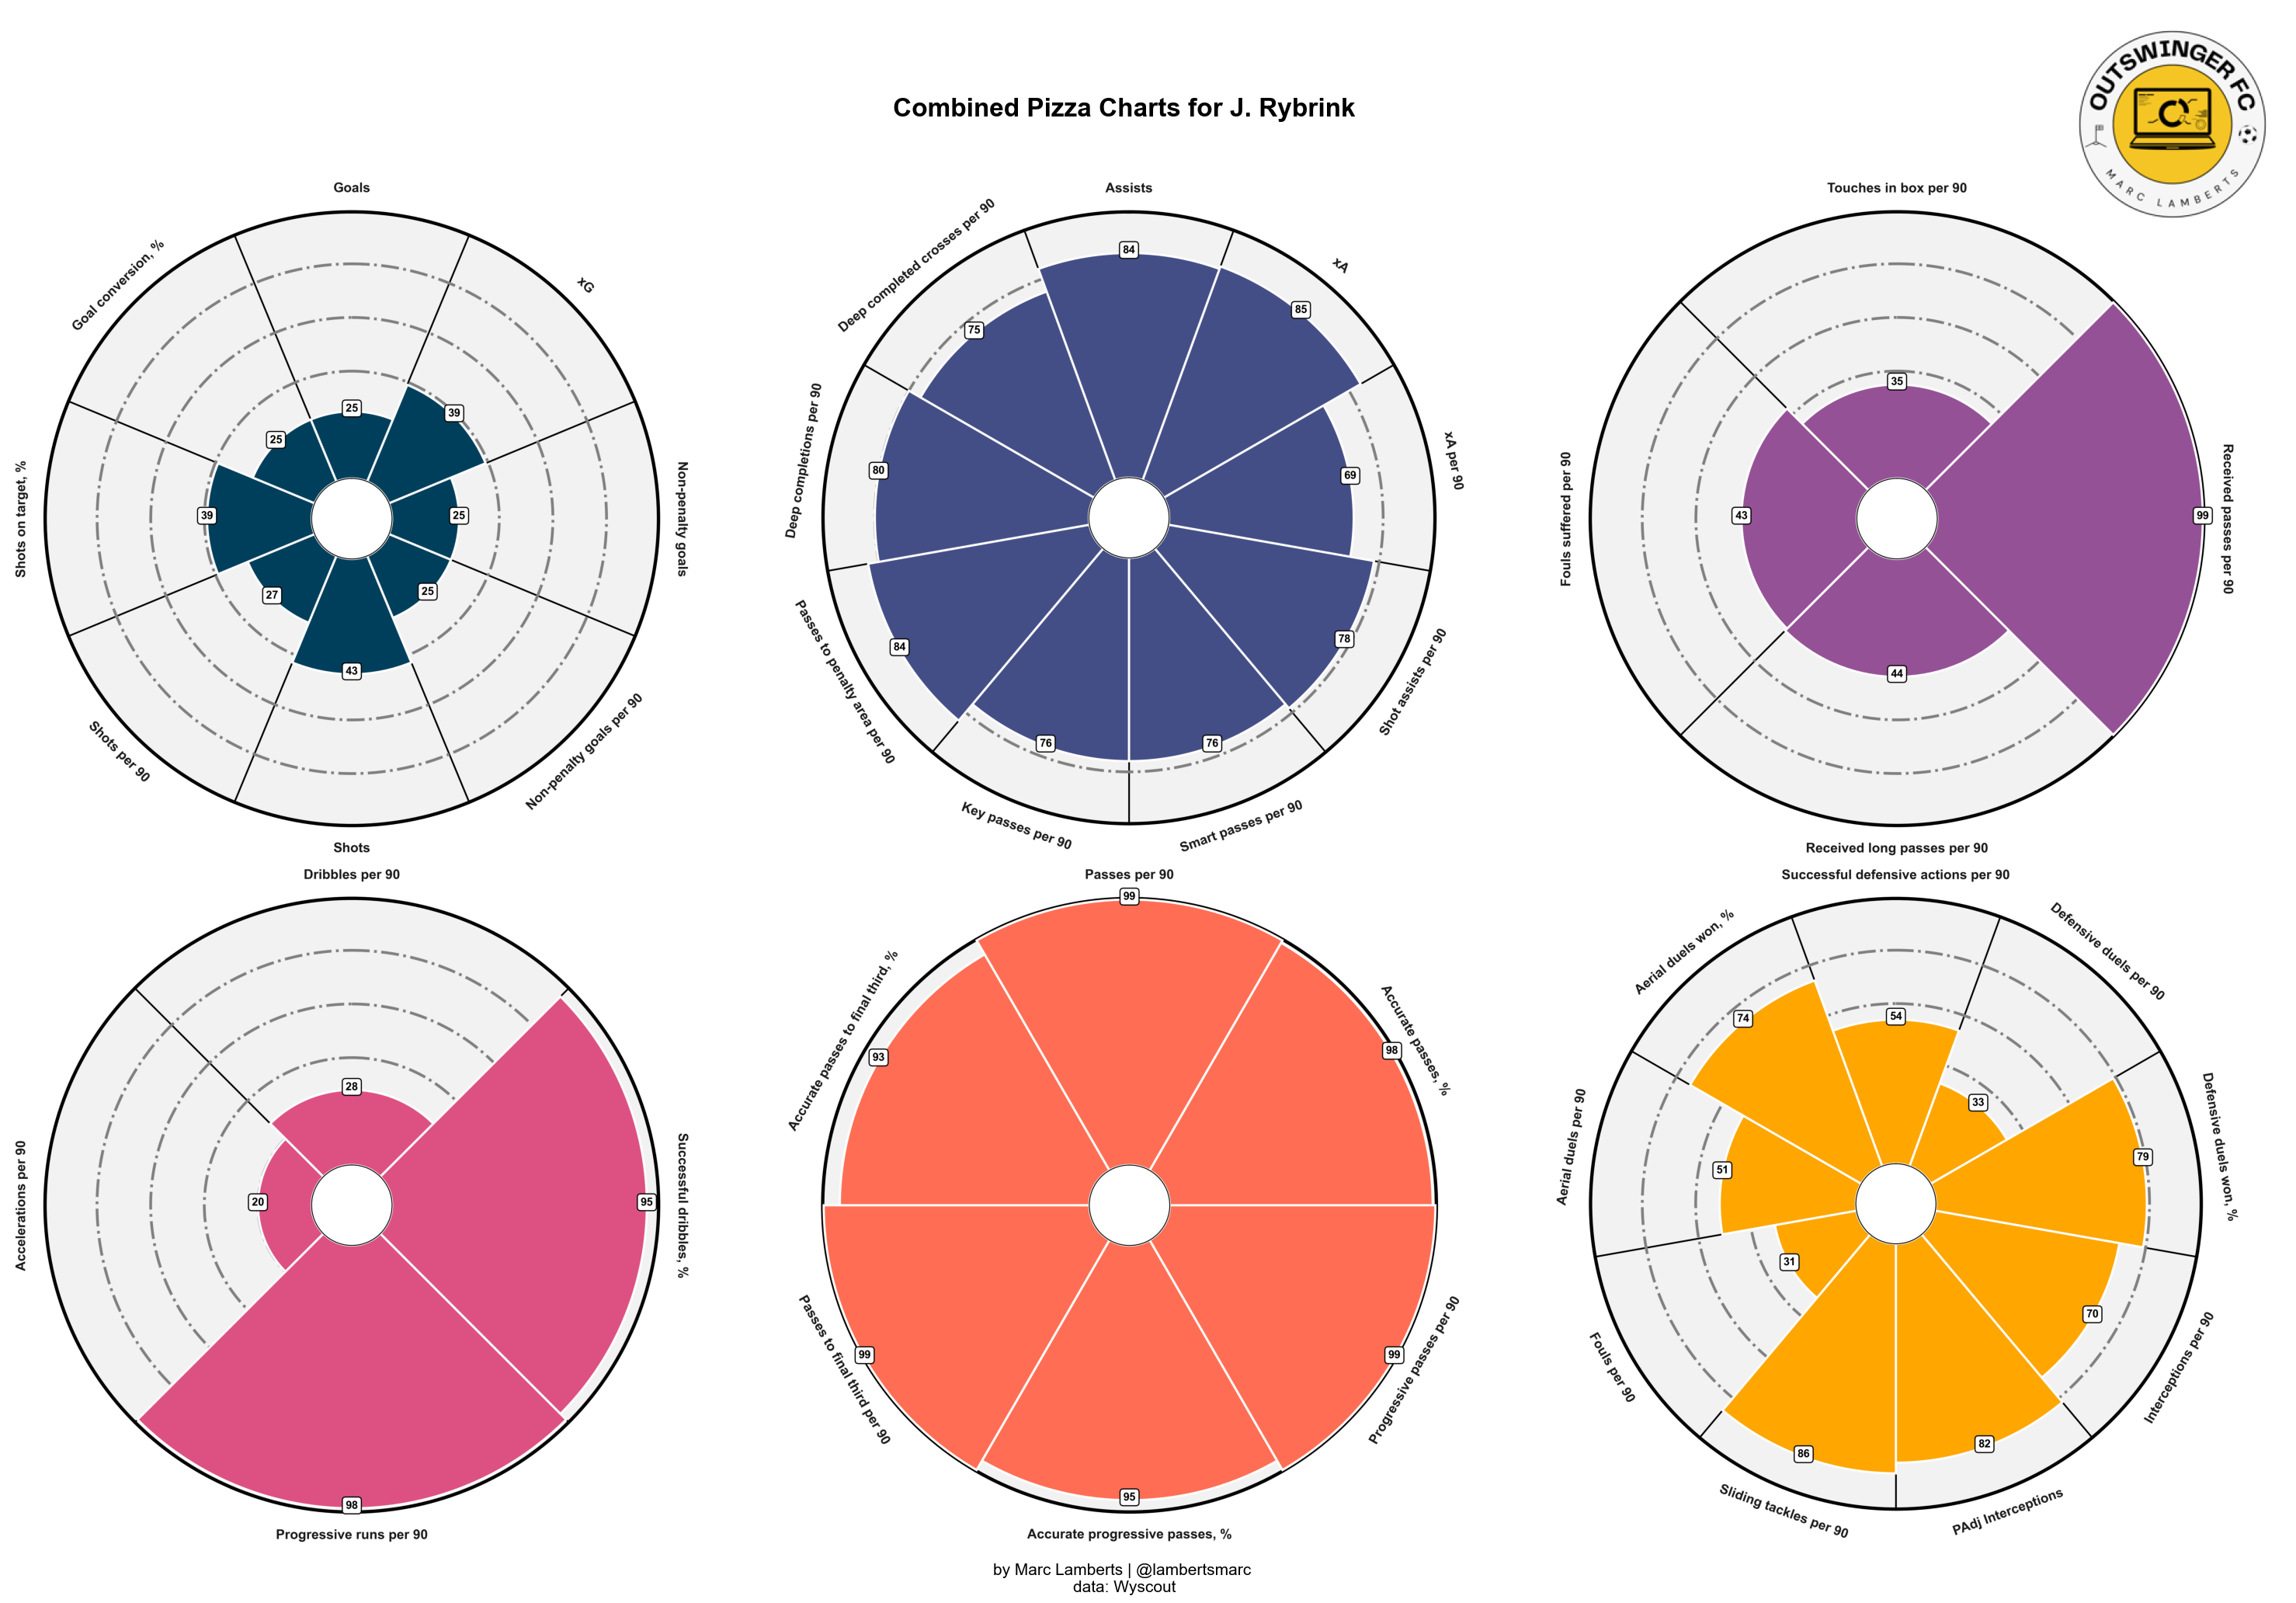

In [16]:
import pandas as pd
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt
from mplsoccer import PyPizza
from datetime import datetime
from PIL import Image

# Load the Excel file
file_path = '/Users/marclambertes/Downloads/Wyscout/SWE.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path)

# Define categories and corresponding metrics
categories = {
    "Shooting": [
        "Goals", "xG", "Non-penalty goals", "Non-penalty goals per 90",
        "Shots", "Shots per 90", "Shots on target, %", "Goal conversion, %"
    ],
    "Creating": [
        "Assists", "xA", "xA per 90", "Shot assists per 90", "Smart passes per 90",
        "Key passes per 90", "Passes to penalty area per 90", "Deep completions per 90",
        "Deep completed crosses per 90"
    ],
    "Receiving": [
        "Touches in box per 90", "Received passes per 90", "Received long passes per 90",
        "Fouls suffered per 90"
    ],
    "Carrying": [
        "Dribbles per 90", "Successful dribbles, %", "Progressive runs per 90", "Accelerations per 90"
    ],
    "Passing": [
        "Passes per 90", "Accurate passes, %", "Progressive passes per 90",
        "Accurate progressive passes, %", "Passes to final third per 90",
        "Accurate passes to final third, %"
    ],
    "Defending": [
        "Successful defensive actions per 90", "Defensive duels per 90", "Defensive duels won, %",
        "Interceptions per 90", "PAdj Interceptions", "Sliding tackles per 90", "Fouls per 90",
        "Aerial duels per 90", "Aerial duels won, %"
    ]
}

# Define a list of new distinct colors for each chart
chart_colors = [
    "#003f5c",  # Shooting (Dark Blue)
    "#444e86",  # Creating (Blue-Purple)
    "#955196",  # Receiving (Purple)
    "#dd5182",  # Carrying (Pink)
    "#ff6e54",  # Passing (Orange-Red)
    "#ffa600"   # Defending (Yellow-Orange)
]

# Select the metrics defined in the categories and filter the dataset
selected_metrics = []
for metrics in categories.values():
    selected_metrics.extend(metrics)

# Keep only the selected metrics, the 'Player' column, and drop the rest
columns_to_keep = ['Player'] + [metric for metric in selected_metrics if metric in df.columns]
filtered_df = df[columns_to_keep]

# Handle missing values by filling them with 0
filtered_df.fillna(0, inplace=True)

# Set the player's name for analysis
player_name = "J. Rybrink"  # Adjust the player name as needed

# Check if the player exists in the dataset
if player_name not in filtered_df['Player'].values:
    raise ValueError(f"Player {player_name} not found in the dataset.")

# Filter data for the player
player_data = filtered_df[filtered_df['Player'] == player_name].reset_index(drop=True)

# Create pizza charts and save them as images
image_files = []
for idx, (category_name, metrics) in enumerate(categories.items()):
    # Filter metrics that exist in the dataset
    valid_metrics = [metric for metric in metrics if metric in filtered_df.columns]
    
    # Calculate the percentile ranks for each role score for the player
    percentile_ranks = [
        math.floor(stats.percentileofscore(filtered_df[metric], player_data[metric].values[0]))
        for metric in valid_metrics
    ]
    percentile_ranks = [99 if rank == 100 else rank for rank in percentile_ranks]  # Handle the 100 percentile case

    # Initialize PyPizza for plotting
    baker = PyPizza(
        params=valid_metrics,
        straight_line_color="black",
        straight_line_lw=1.5,
        last_circle_lw=6,
        other_circle_lw=2.5,
        other_circle_ls="-.",
        inner_circle_size=15
    )

    # Assign a distinct color for each category
    slice_colors = [chart_colors[idx]] * len(valid_metrics)  # Use one distinct color for each chart

    # Plot pizza
    fig, ax = baker.make_pizza(
        percentile_ranks,
        figsize=(10, 10),
        slice_colors=slice_colors,
        kwargs_slices=dict(
            edgecolor="white",
            zorder=2,
            linewidth=2
        ),
        kwargs_params=dict(
            color="black", fontsize=12, weight='bold', fontname="Arial",
            va="center", alpha=.9
        ),
        kwargs_values=dict(
            color="black", fontsize=10, weight='bold', fontname="Arial",
            zorder=3,
            bbox=dict(
                edgecolor="black",
                facecolor="white",
                boxstyle="round,pad=0.3",
                lw=1
            )
        )
    )

    # Save each pizza chart as an image
    image_file = f'{player_name}_{category_name}_pizza_chart.png'
    fig.savefig(image_file, dpi=300, bbox_inches='tight', facecolor='white')
    image_files.append(image_file)
    plt.close(fig)

# Combine all saved pizza charts into a single plot
fig, axs = plt.subplots(2, 3, figsize=(30, 20))
fig.patch.set_facecolor('white')

for idx, image_file in enumerate(image_files):
    row, col = divmod(idx, 3)
    img = Image.open(image_file)
    axs[row, col].imshow(img)
    axs[row, col].axis('off')

# Add logo to the top-right corner
logo_path = 'Outswinger FC (3).png'  # Replace with the actual path to your logo image
logo = Image.open(logo_path)
logo_ax = fig.add_axes([0.85, 0.90, 0.15, 0.15], anchor='NE', zorder=1)  # Adjust size and position
logo_ax.imshow(logo)
logo_ax.axis('off')

# Add footer text
fig.text(0.5, 0.03, "by Marc Lamberts | @lambertsmarc \ndata: Wyscout", size=15, color="black", ha="center", fontname="Arial")
fig.text(0.5, 0.98, f"Combined Pizza Charts for {player_name}", size=24, ha="center", color="black", weight="bold", fontname="Arial")

# Save the combined plot as a single image
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig(f'{player_name}_combined_pizza_charts_with_logo.png', dpi=300, facecolor='white')
plt.show()


/var/folders/68/mhmqcpdn52943pyql2n4wj440000gn/T/ipykernel_48717/4033718231.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.fillna(0, inplace=True)


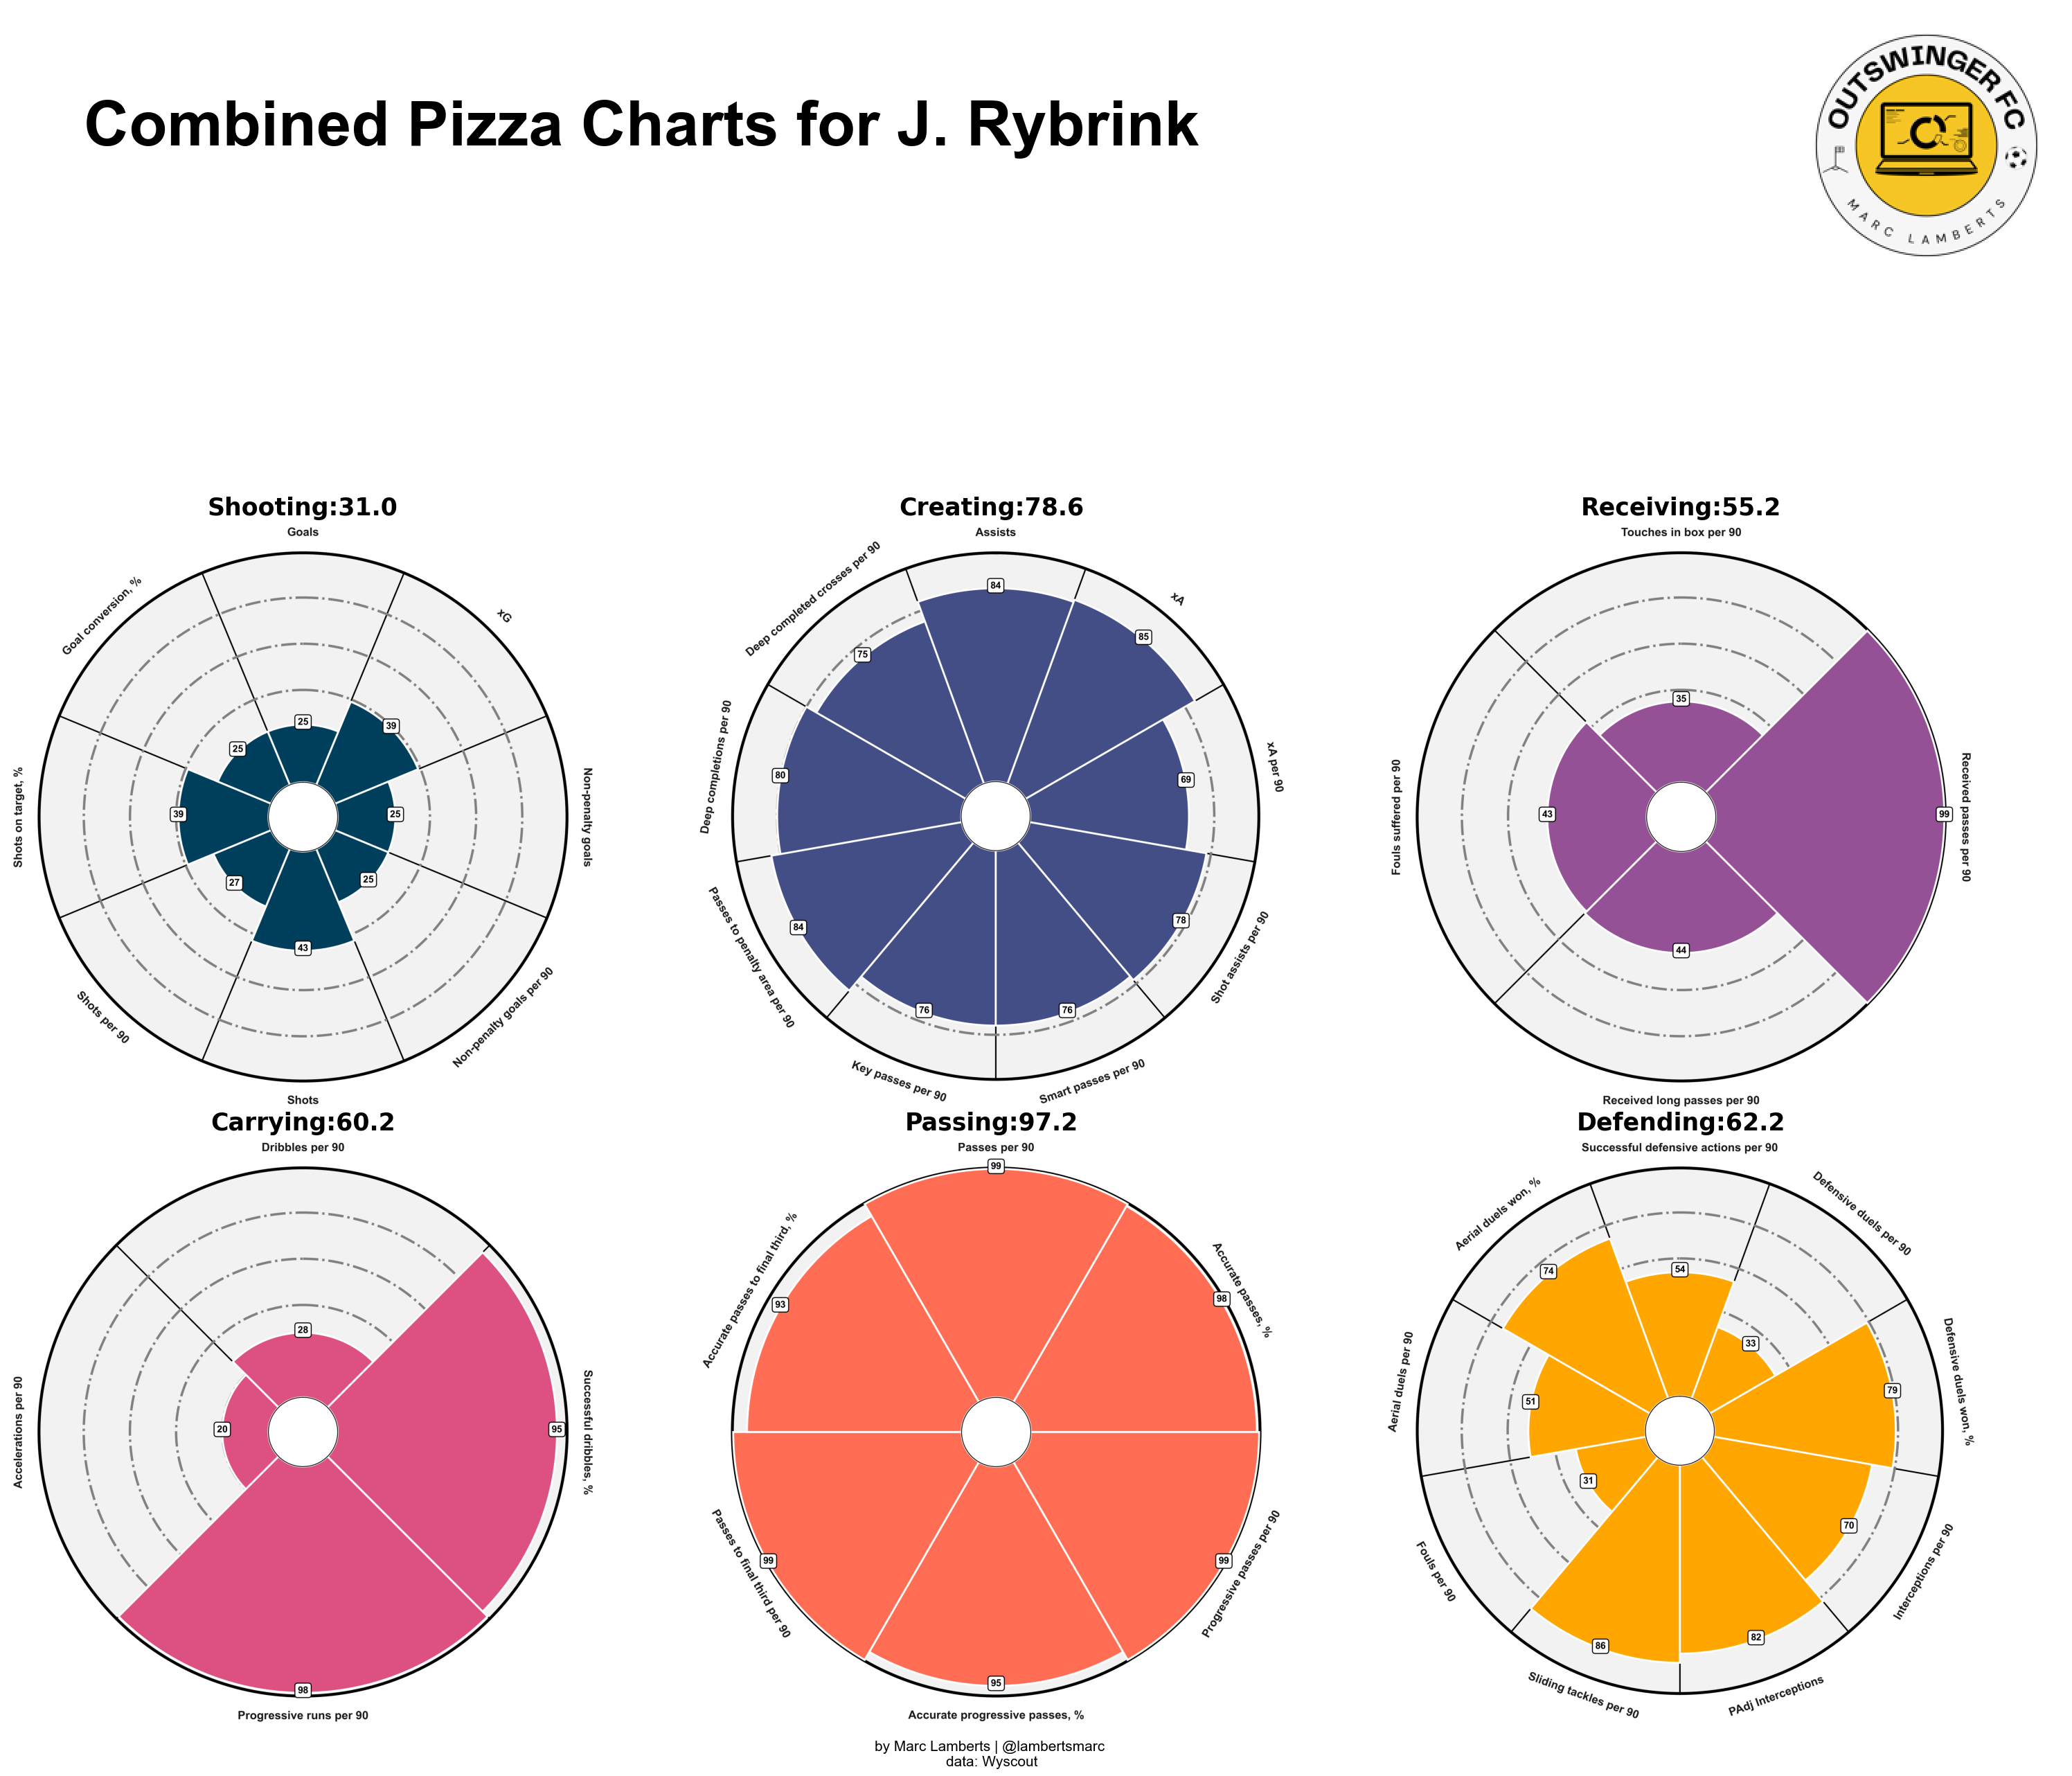

In [31]:
import pandas as pd
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt
from mplsoccer import PyPizza
from datetime import datetime
from PIL import Image

# Load the Excel file
file_path = '/Users/marclambertes/Downloads/Wyscout/SWE.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path)

# Define categories and corresponding metrics
categories = {
    "Shooting": [
        "Goals", "xG", "Non-penalty goals", "Non-penalty goals per 90",
        "Shots", "Shots per 90", "Shots on target, %", "Goal conversion, %"
    ],
    "Creating": [
        "Assists", "xA", "xA per 90", "Shot assists per 90", "Smart passes per 90",
        "Key passes per 90", "Passes to penalty area per 90", "Deep completions per 90",
        "Deep completed crosses per 90"
    ],
    "Receiving": [
        "Touches in box per 90", "Received passes per 90", "Received long passes per 90",
        "Fouls suffered per 90"
    ],
    "Carrying": [
        "Dribbles per 90", "Successful dribbles, %", "Progressive runs per 90", "Accelerations per 90"
    ],
    "Passing": [
        "Passes per 90", "Accurate passes, %", "Progressive passes per 90",
        "Accurate progressive passes, %", "Passes to final third per 90",
        "Accurate passes to final third, %"
    ],
    "Defending": [
        "Successful defensive actions per 90", "Defensive duels per 90", "Defensive duels won, %",
        "Interceptions per 90", "PAdj Interceptions", "Sliding tackles per 90", "Fouls per 90",
        "Aerial duels per 90", "Aerial duels won, %"
    ]
}

# Define a list of new distinct colors for each chart
chart_colors = [
    "#003f5c",  # Shooting (Dark Blue)
    "#444e86",  # Creating (Blue-Purple)
    "#955196",  # Receiving (Purple)
    "#dd5182",  # Carrying (Pink)
    "#ff6e54",  # Passing (Orange-Red)
    "#ffa600"   # Defending (Yellow-Orange)
]

# Select the metrics defined in the categories and filter the dataset
selected_metrics = []
for metrics in categories.values():
    selected_metrics.extend(metrics)

# Keep only the selected metrics, the 'Player' column, and drop the rest
columns_to_keep = ['Player'] + [metric for metric in selected_metrics if metric in df.columns]
filtered_df = df[columns_to_keep]

# Handle missing values by filling them with 0
filtered_df.fillna(0, inplace=True)

# Set the player's name for analysis
player_name = "J. Rybrink"  # Adjust the player name as needed

# Check if the player exists in the dataset
if player_name not in filtered_df['Player'].values:
    raise ValueError(f"Player {player_name} not found in the dataset.")

# Filter data for the player
player_data = filtered_df[filtered_df['Player'] == player_name].reset_index(drop=True)

# Create pizza charts and save them as images
image_files = []
average_percentiles = []
for idx, (category_name, metrics) in enumerate(categories.items()):
    # Filter metrics that exist in the dataset
    valid_metrics = [metric for metric in metrics if metric in filtered_df.columns]
    
    # Calculate the percentile ranks for each role score for the player
    percentile_ranks = [
        math.floor(stats.percentileofscore(filtered_df[metric], player_data[metric].values[0]))
        for metric in valid_metrics
    ]
    percentile_ranks = [99 if rank == 100 else rank for rank in percentile_ranks]  # Handle the 100 percentile case

    # Calculate the average percentile for the category
    avg_percentile = round(np.mean(percentile_ranks), 1)
    average_percentiles.append((category_name, avg_percentile))

    # Initialize PyPizza for plotting
    baker = PyPizza(
        params=valid_metrics,
        straight_line_color="black",
        straight_line_lw=1.5,
        last_circle_lw=6,
        other_circle_lw=2.5,
        other_circle_ls="-.",
        inner_circle_size=15
    )

    # Assign a distinct color for each category
    slice_colors = [chart_colors[idx]] * len(valid_metrics)  # Use one distinct color for each chart

    # Plot pizza
    fig, ax = baker.make_pizza(
        percentile_ranks,
        figsize=(10, 10),
        slice_colors=slice_colors,
        kwargs_slices=dict(
            edgecolor="white",
            zorder=2,
            linewidth=2
        ),
        kwargs_params=dict(
            color="black", fontsize=12, weight='bold', fontname="Arial",
            va="center", alpha=.9
        ),
        kwargs_values=dict(
            color="black", fontsize=10, weight='bold', fontname="Arial",
            zorder=3,
            bbox=dict(
                edgecolor="black",
                facecolor="white",
                boxstyle="round,pad=0.3",
                lw=1
            )
        )
    )

    # Save each pizza chart as an image
    image_file = f'{player_name}_{category_name}_pizza_chart.png'
    fig.savefig(image_file, dpi=300, bbox_inches='tight', facecolor='white')
    image_files.append(image_file)
    plt.close(fig)

# Combine all saved pizza charts into a single plot
fig, axs = plt.subplots(2, 3, figsize=(30, 20))
fig.patch.set_facecolor('white')

for idx, image_file in enumerate(image_files):
    row, col = divmod(idx, 3)
    img = Image.open(image_file)
    axs[row, col].imshow(img)
    axs[row, col].axis('off')
    # Add category title and average percentile
    category_name, avg_percentile = average_percentiles[idx]
    axs[row, col].set_title(f"{category_name}:{avg_percentile}", fontsize=25, color="black", weight='bold')

# Add logo to the top-right corner
logo_path = 'Outswinger FC (3).png'  # Replace with the actual path to your logo image
logo = Image.open(logo_path)
logo_ax = fig.add_axes([0.85, 1.1, 0.2, 0.2], zorder=1)  # Adjust size and position
logo_ax.imshow(logo)
logo_ax.axis('off')

# Add footer text
fig.text(0.5, 0.03, "by Marc Lamberts | @lambertsmarc \ndata: Wyscout", size=15, color="black", ha="center", fontname="Arial")
fig.text(0.6, 1.2, f"Combined Pizza Charts for {player_name}", size=65, ha="right", color="black", weight="bold", fontname="Arial")

# Save the combined plot as a single image
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig(f'{player_name}_combined_pizza_charts_with_logo.png', dpi=300, facecolor='white')
plt.show()


/var/folders/68/mhmqcpdn52943pyql2n4wj440000gn/T/ipykernel_48717/849298203.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.fillna(0, inplace=True)


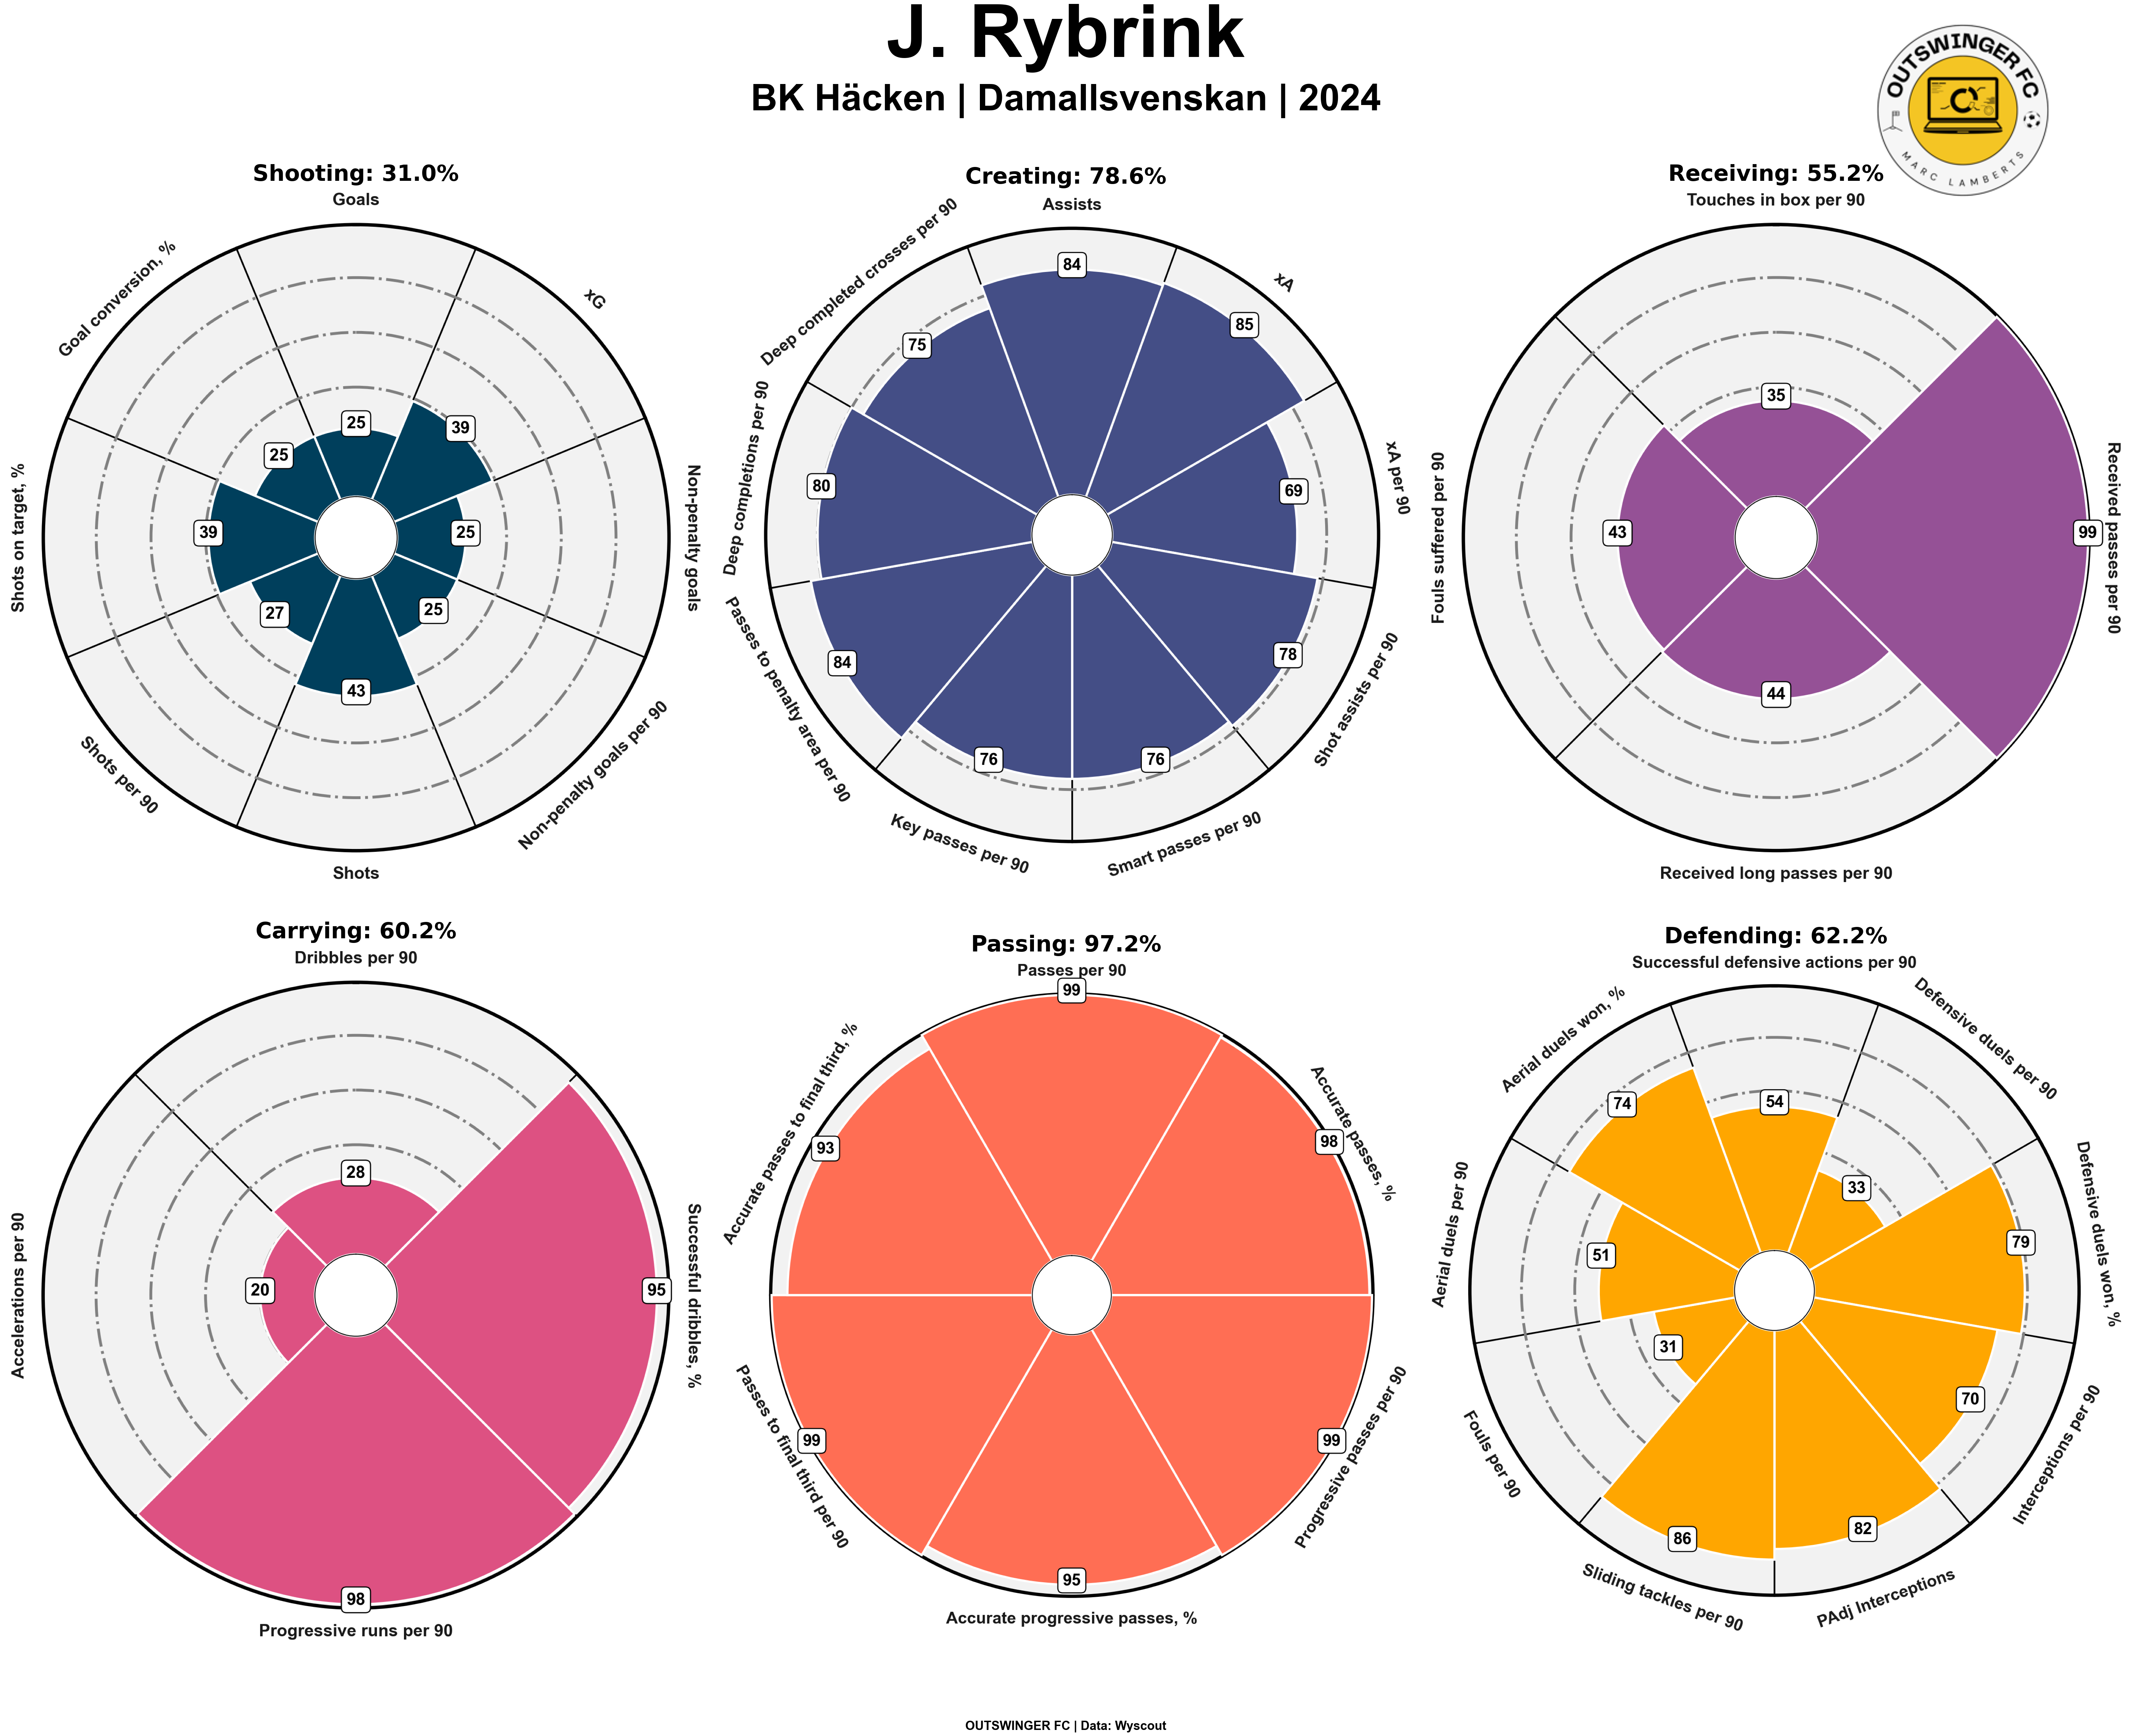

In [64]:
import pandas as pd
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt
from mplsoccer import PyPizza
from datetime import datetime
from PIL import Image

# Load the Excel file
file_path = '/Users/marclambertes/Downloads/Wyscout/SWE.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path)

# Define categories and corresponding metrics
categories = {
    "Shooting": [
        "Goals", "xG", "Non-penalty goals", "Non-penalty goals per 90",
        "Shots", "Shots per 90", "Shots on target, %", "Goal conversion, %"
    ],
    "Creating": [
        "Assists", "xA", "xA per 90", "Shot assists per 90", "Smart passes per 90",
        "Key passes per 90", "Passes to penalty area per 90", "Deep completions per 90",
        "Deep completed crosses per 90"
    ],
    "Receiving": [
        "Touches in box per 90", "Received passes per 90", "Received long passes per 90",
        "Fouls suffered per 90"
    ],
    "Carrying": [
        "Dribbles per 90", "Successful dribbles, %", "Progressive runs per 90", "Accelerations per 90"
    ],
    "Passing": [
        "Passes per 90", "Accurate passes, %", "Progressive passes per 90",
        "Accurate progressive passes, %", "Passes to final third per 90",
        "Accurate passes to final third, %"
    ],
    "Defending": [
        "Successful defensive actions per 90", "Defensive duels per 90", "Defensive duels won, %",
        "Interceptions per 90", "PAdj Interceptions", "Sliding tackles per 90", "Fouls per 90",
        "Aerial duels per 90", "Aerial duels won, %"
    ]
}

# Define a list of new distinct colors for each chart
chart_colors = [
    "#003f5c",  # Shooting (Dark Blue)
    "#444e86",  # Creating (Blue-Purple)
    "#955196",  # Receiving (Purple)
    "#dd5182",  # Carrying (Pink)
    "#ff6e54",  # Passing (Orange-Red)
    "#ffa600"   # Defending (Yellow-Orange)
]

# Select the metrics defined in the categories and filter the dataset
selected_metrics = []
for metrics in categories.values():
    selected_metrics.extend(metrics)

# Keep only the selected metrics, the 'Player' column, and drop the rest
columns_to_keep = ['Player'] + [metric for metric in selected_metrics if metric in df.columns]
filtered_df = df[columns_to_keep]

# Handle missing values by filling them with 0
filtered_df.fillna(0, inplace=True)

# Set the player's name for analysis
player_name = "J. Rybrink"  # Adjust the player name as needed

# Check if the player exists in the dataset
if player_name not in filtered_df['Player'].values:
    raise ValueError(f"Player {player_name} not found in the dataset.")

# Filter data for the player
player_data = filtered_df[filtered_df['Player'] == player_name].reset_index(drop=True)

# Create pizza charts and save them as images
image_files = []
average_percentiles = []
for idx, (category_name, metrics) in enumerate(categories.items()):
    # Filter metrics that exist in the dataset
    valid_metrics = [metric for metric in metrics if metric in filtered_df.columns]
    
    # Calculate the percentile ranks for each role score for the player
    percentile_ranks = [
        math.floor(stats.percentileofscore(filtered_df[metric], player_data[metric].values[0]))
        for metric in valid_metrics
    ]
    percentile_ranks = [99 if rank == 100 else rank for rank in percentile_ranks]  # Handle the 100 percentile case

    # Calculate the average percentile for the category
    avg_percentile = round(np.mean(percentile_ranks), 1)
    average_percentiles.append((category_name, avg_percentile))

    # Initialize PyPizza for plotting
    baker = PyPizza(
        params=valid_metrics,
        straight_line_color="black",
        straight_line_lw=1.5,
        last_circle_lw=6,
        other_circle_lw=2.5,
        other_circle_ls="-.",
        inner_circle_size=15
    )

    # Assign a distinct color for each category
    slice_colors = [chart_colors[idx]] * len(valid_metrics)  # Use one distinct color for each chart

    # Plot pizza
    fig, ax = baker.make_pizza(
        percentile_ranks,
        figsize=(10, 10),
        slice_colors=slice_colors,
        kwargs_slices=dict(
            edgecolor="white",
            zorder=2,
            linewidth=2
        ),
        kwargs_params=dict(
            color="black", fontsize=15, weight='bold', fontname="Arial",
            va="center", alpha=.9
        ),
        kwargs_values=dict(
            color="black", fontsize=15, weight='bold', fontname="Arial",
            zorder=3,
            bbox=dict(
                edgecolor="black",
                facecolor="white",
                boxstyle="round,pad=0.3",
                lw=1
            )
        )
    )

    # Save each pizza chart as an image
    image_file = f'{player_name}_{category_name}_pizza_chart.png'
    fig.savefig(image_file, dpi=200, bbox_inches='tight', facecolor='white')
    image_files.append(image_file)
    plt.close(fig)

# Combine all saved pizza charts into a single plot
fig, axs = plt.subplots(2, 3, figsize=(60, 50))  # Larger plot size
fig.patch.set_facecolor('white')

# Add space between rows
plt.subplots_adjust(hspace=0.7)  # Increased vertical spacing between rows

for idx, image_file in enumerate(image_files):
    row, col = divmod(idx, 3)
    img = Image.open(image_file)
    axs[row, col].imshow(img)
    axs[row, col].axis('off')
    # Add category title and average percentile
    category_name, avg_percentile = average_percentiles[idx]
    axs[row, col].set_title(f"{category_name}: {avg_percentile}%", fontsize=45, color="black", weight='bold')  # Larger font size

# Add logo to the top-right corner using `add_axes`
logo_path = 'Outswinger FC (3).png'  # Replace with the actual path to your logo image
logo = Image.open(logo_path)

# Define a smaller axes for the logo and place it at the top-right corner
logo_ax = fig.add_axes([0.86, 0.87, 0.12, 0.12])  # [left, bottom, width, height]
logo_ax.imshow(logo)
logo_ax.axis('off')  # Turn off axes for the logo




# Add footer text and title
fig.text(0.5, 0.02, "OUTSWINGER FC | Data: Wyscout", size=25, color="black", ha="center", fontname="Arial", weight='bold')  # Larger footer text
fig.text(0.5, 0.96, f"{player_name}", size=150, ha="center", color="black", weight="bold", fontname="Arial")  # Larger title text
fig.text(0.5, 0.93, f"BK Häcken | Damallsvenskan | 2024", size=75, ha="center", color="black", weight="bold", fontname="Arial")  # Larger title text

# Save the combined plot as a single image
plt.tight_layout(rect=[0, 0.05, 1, 0.91])  # Adjust layout for larger canvas
plt.savefig(f'{player_name}_combined_pizza_charts_with_logo_large.png', dpi=200, facecolor='white')
plt.show()
